<a href="https://www.kaggle.com/code/dimasprayoga/women-s-e-commerce-clothing-reviews?scriptVersionId=255737758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [2]:
# Load CSV
women_reviews = pd.read_csv("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

# Lihat 5 baris pertama
women_reviews.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [3]:
# Melihat Statistik deskriptif dataset
women_reviews.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


# Data Cleaning

In [4]:
# Melihat duplikasi
women_reviews.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
# Menghapus Kolom Tidak Diperlukan
women_reviews.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Missing Values 
# Kolom Title (3810 missing)
women_reviews['Title'] = women_reviews['Title'].fillna("")
# Kolom Review Text (845 missing)
women_reviews = women_reviews.dropna(subset=['Review Text'])
# Kolom Division Name, Department Name, Class Name (14 missing masing-masing)
women_reviews.fillna({'Division Name': 'Unknown',
                      'Department Name': 'Unknown',
                      'Class Name': 'Unknown'}, inplace=True)

In [7]:
# Memastikan Tipe Data
women_reviews['Age'] = women_reviews['Age'].astype(int)
women_reviews['Rating'] = women_reviews['Rating'].astype(int)

In [8]:
# Menghilangkan Duplikat
women_reviews.drop_duplicates(inplace=True)
women_reviews['Title'] = women_reviews['Title'].fillna("No Title")

In [9]:
# Normalisasikan Teks


women_reviews['Review Text'] = women_reviews['Review Text'].str.lower()
women_reviews['Review Text'] = women_reviews['Review Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


In [10]:
# Melihat 5 baris pertama
women_reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# EDA (Exploratory Data Analysis)

# Gambaran Umum Dataset

In [11]:
# Melihat jumlah baris & kolom
women_reviews.shape

# Melihat tipe data tiap kolom
women_reviews.info()

# Melihat Statistik deskriptif dataset
women_reviews.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    22640 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22640 non-null  object
 8   Department Name          22640 non-null  object
 9   Class Name               22640 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22640.000000,22640.000000,22640.000000,22640.000000,22640.000000
mean,919.327827,43.280654,4.183525,0.818860,2.630698
std,202.270191,12.327181,1.115774,0.385142,5.786265
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


# Distribusi Rating Pelanggan

In [12]:

# Hitung distribusi rating
rating_counts = women_reviews['Rating'].value_counts().sort_index()
rating_percent = rating_counts / rating_counts.sum() * 100

print("Distribusi Rating (jumlah):\n", rating_counts)
print("\nDistribusi Rating (persentase):\n", rating_percent.round(2))

Distribusi Rating (jumlah):
 Rating
1      821
2     1549
3     2823
4     4908
5    12539
Name: count, dtype: int64

Distribusi Rating (persentase):
 Rating
1     3.63
2     6.84
3    12.47
4    21.68
5    55.38
Name: count, dtype: float64


<Axes: xlabel='Rating', ylabel='count'>

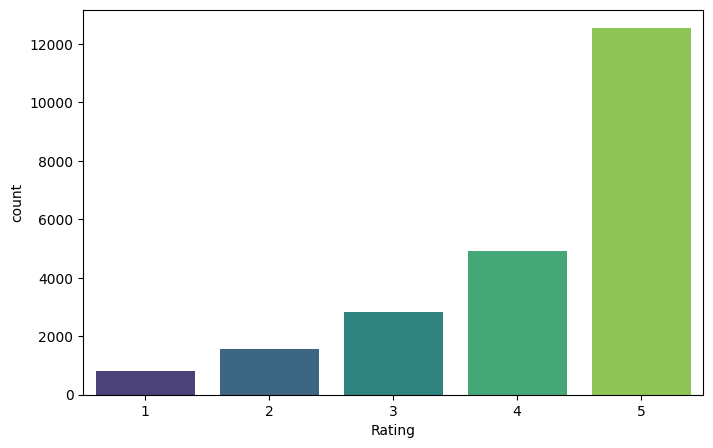

In [13]:
# Visualisasi Barchart (countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=women_reviews, palette='viridis')

Conclusion : The women's clothing e-commerce site received 12,000 more 5-star reviews than 1-star reviews. There were only 800 reviews with a 1-star rating, which is under 2,000 total reviews.

# Produk Paling Banyak Direview & Performanya

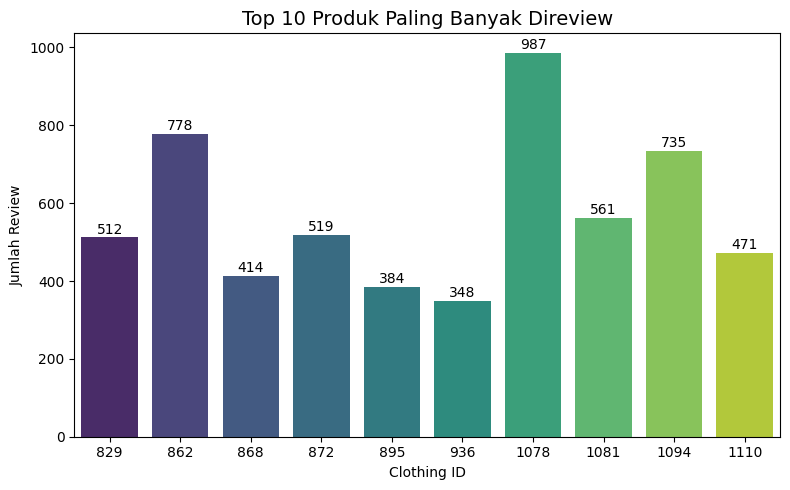

In [14]:
# "Produk Paling Banyak Direview & Performanya"
product_reviews = women_reviews.groupby('Clothing ID').agg(
    jumlah_review=('Clothing ID', 'count'),
    rata_rata_rating=('Rating', 'mean')
).reset_index()

# Mengambil 10 produk paling banyak direview
top_products = product_reviews.sort_values(by='jumlah_review', ascending=False).head(10)

# Visualisasi Barchart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Clothing ID', 
    y='jumlah_review', 
    data= top_products, 
    palette='viridis'
)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,  # posisi x di tengah batang
        p.get_height() + 10,          # posisi y sedikit di atas batang
        int(p.get_height()),          # nilai anotasi
        ha='center'                   # rata tengah
    )

plt.title("Top 10 Produk Paling Banyak Direview", fontsize=14)
plt.xlabel("Clothing ID")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()

Conclusion, Based on the histogram, Clothing ID "1078" has the highest number of 5-star reviews, totaling approximately 987. This clothing item is among the top 10 most-reviewed items.

# Target Pelanggan Berdasarkan Demografi (Age)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


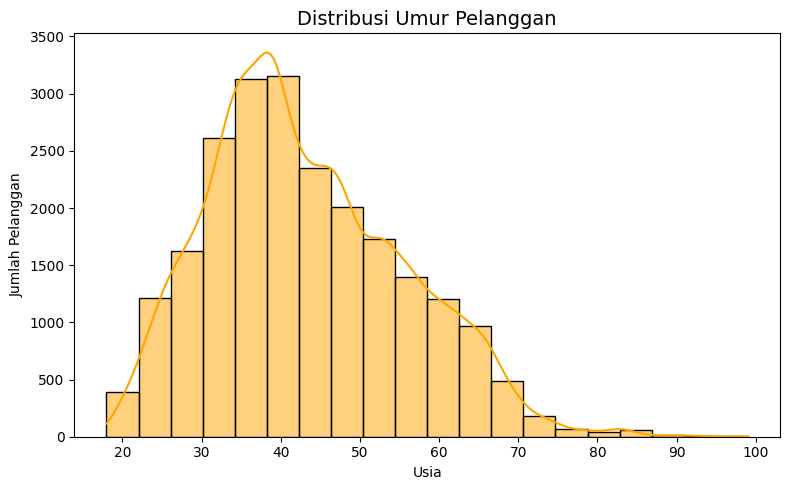

In [15]:
# Melihat Distribusi umur pelanggan
plt.figure(figsize=(8,5))
sns.histplot(women_reviews['Age'], bins=20, kde=True, color='orange')
plt.title("Distribusi Umur Pelanggan", fontsize=14)
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

# Segmentasi umur (misal: 18-25, 26-35, dst.)
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '26-35', '36-45', '46-55', '56-65', '65+']
women_reviews['Age Group'] = pd.cut(women_reviews['Age'], bins=bins, labels=labels)



/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_13/404638159.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{age_group_percent[i]:.1f}%",       # format persentase 1 desimal


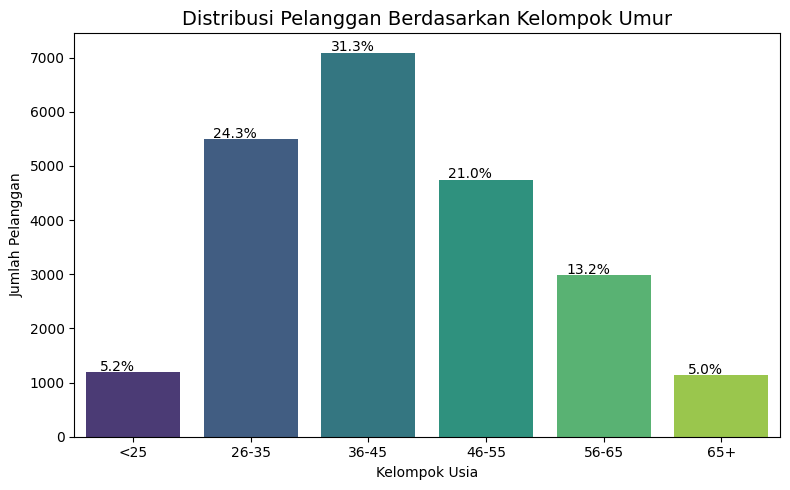

In [16]:
# Hitung proporsi tiap segmen umur
age_group_counts = women_reviews['Age Group'].value_counts().sort_index()
age_group_percent = (age_group_counts / age_group_counts.sum()) * 100

plt.figure(figsize=(8,5))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

for i, p in enumerate(ax.patches):
    ax.text(
        p.get_x() + p.get_width()/3,          # posisi X tengah batang
        p.get_height() + 20,                  # posisi Y sedikit di atas batang
        f"{age_group_percent[i]:.1f}%",       # format persentase 1 desimal
        ha='center', fontsize=10, color='black'
    )

plt.title("Distribusi Pelanggan Berdasarkan Kelompok Umur", fontsize=14)
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

Conclusion, Based on the age distribution histogram, the majority of customers are aged 36-45, followed by customers aged 26-35. Customers aged 36-45 account for 31.1% of the total number of customers.

# Summary

1. **Customer Rating Distribution**

The women's clothing e-commerce platform recorded 12,000 more 5-star reviews than 1-star reviews.

Only about 800 reviews were 1-star, representing less than 2,000 total reviews, which indicates generally positive customer sentiment.

2. **Top Product Performance**

Clothing ID 1078 stands out with the highest number of 5-star reviews (~987).

This product is part of the top 10 most-reviewed items on the platform, indicating strong customer preference and engagement.

3. **Customer Age Demographics**

The largest customer segment is ages 36–45, making up 31.1% of all customers.

The second-largest group is ages 26–35.

These insights suggest a primary target audience of women aged 26–45.

// 

1. **Distribusi Peringkat Pelanggan**

Platform e-commerce pakaian wanita ini menerima 12.000 ulasan bintang 5 lebih banyak dibandingkan ulasan bintang 1.

Dengan hanya sekitar 800 ulasan yang diberi peringkat bintang 1, yang mencakup kurang dari 2.000 ulasan total, hal ini mencerminkan sentimen pelanggan yang umumnya positif.

2. **Performa Produk Terbaik**

ID Pakaian 1078 terkenal karena memiliki jumlah ulasan bintang 5 tertinggi (sekitar 987).

Produk ini berada di antara 10 produk yang paling banyak diulas di platform, menunjukkan preferensi dan keterlibatan pelanggan yang kuat.

3. **Demografi Usia Pelanggan**

Demografi pelanggan yang dominan terdiri dari individu berusia 36–45 tahun, mewakili 31,1% dari total basis pelanggan.

Kelompok demografi terbesar kedua mencakup mereka yang berusia 26–35 tahun.

Temuan ini menunjukkan bahwa target audiens utama adalah perempuan berusia 26–45 tahun.

# Context, Insights, and Recommendations

1. **Context**

This women's apparel e-commerce platform relies on customer reviews as an indicator of product quality, satisfaction levels, and market preferences. Rating data, product performance, and customer demographics provide a clear picture for determining marketing strategies, product management, and customer service development.

2. **Insights**

**Customer Rating Distribution**
* The majority of customer reviews are positive, with approximately 12,000 more 5-star reviews than 1-star reviews.

* Only approximately 800 1-star reviews indicate low levels of customer dissatisfaction.

**Top Product Performance**
* Clothing ID 1078 is a top product with approximately 987 5-star reviews, making it one of the top 10 most reviewed products.

* The high number of reviews and ratings indicates strong customer engagement and satisfaction with this product.

**Customer Age Demographics**
* The largest age group is 36–45 years old (31.1%), followed by 26–35 years old.

* This means that the primary target platform is women aged 26–45, who likely have stable purchasing power and clear fashion preferences.

3. **Recommendations Marketing Strategy**

**Focus the campaign** 

* on the 26–45 age segment through advertising on relevant social media platforms (Instagram, Facebook, Pinterest).

* Use models or influencers who represent this age segment.

**Product Management**

* Maintain inventory and variety of popular products, such as Clothing ID 1078.

* Analyze the features and design of these products to apply to new products.

**Customer Service Optimization**

* Use rating data to identify products receiving 1–2 stars and make quality improvements.

* Increase positive reviews with post-purchase follow-up strategies or loyalty programs.

**Sales Experiments**

* Test bundled packages or special discounts on favorite products in key age segments.

* Adjust your product catalog to reflect fashion trends for the 26–45 age group.


// 

1. **Konteks**

Platform e-commerce pakaian wanita ini mengandalkan ulasan pelanggan sebagai indikator kualitas produk, tingkat kepuasan, dan preferensi pasar. Data peringkat, kinerja produk, dan demografi pelanggan memberikan gambaran yang jelas untuk menentukan strategi pemasaran, manajemen produk, dan pengembangan layanan pelanggan.

2. **Wawasan**

**Distribusi Peringkat Pelanggan**
* Mayoritas ulasan pelanggan bersifat positif, dengan sekitar 12.000 ulasan bintang 5 lebih banyak daripada ulasan bintang 1.

* Hanya sekitar 800 ulasan bintang 1 yang menunjukkan tingkat ketidakpuasan pelanggan yang rendah.

**Kinerja Produk Terbaik**
* Clothing ID 1078 adalah produk terbaik dengan sekitar 987 ulasan bintang 5, menjadikannya salah satu dari 10 produk yang paling banyak diulas.

* Tingginya jumlah ulasan dan peringkat menunjukkan keterlibatan dan kepuasan pelanggan yang kuat terhadap produk ini.

**Demografi Usia Pelanggan**
* Kelompok usia terbesar adalah 36–45 tahun (31,1%), diikuti oleh 26–35 tahun.

* Ini berarti platform target utama adalah perempuan berusia 26–45 tahun, yang kemungkinan memiliki daya beli yang stabil dan preferensi mode yang jelas.

3. **Rekomendasi Strategi Pemasaran**

**Fokuskan kampanye**

* pada segmen usia 26–45 tahun melalui iklan di platform media sosial yang relevan (Instagram, Facebook, Pinterest).

* Gunakan model atau influencer yang mewakili segmen usia ini.

**Manajemen Produk**

* Pertahankan inventaris dan variasi produk populer, seperti Clothing ID 1078.

* Analisis fitur dan desain produk ini untuk diterapkan pada produk baru.

**Optimalisasi Layanan Pelanggan**

* Gunakan data peringkat untuk mengidentifikasi produk yang menerima 1–2 bintang dan lakukan peningkatan kualitas.

* Tingkatkan ulasan positif dengan strategi tindak lanjut pascapembelian atau program loyalitas.

**Eksperimen Penjualan**

* Uji paket bundel atau diskon khusus untuk produk favorit di segmen usia utama.

* Sesuaikan katalog produk Anda agar mencerminkan tren mode untuk kelompok usia 26–45 tahun.